In [1]:
import numpy as np
import matplotlib.pyplot as plt
import IPython.display as ipd
import librosa
import librosa.display

In [2]:
def get_stft(x, win, hop):
    """
    Parameters
    ----------
    x: ndarray(N)
        Audio array
    win: int
        Number of samples in each window
    hop: int
        Amount to shift in time from one window to the next
    """
    # Height of my stft is win
    # Width = (len(x) - win)/hop + 1
    width = (len(x)-win)//hop + 1
    S = np.zeros((win, width), dtype=complex)
    #win_fn = 0.5*(1 - np.cos(2*np.pi*)) # need to get from tralie 
    for j in range(width):
        xj = x[j*hop:j*hop+win]
        S[:, j] = np.fft.fft(xj)
    return S

In [3]:
sr = 44100
t = np.arange(sr)/sr
y = np.cos(2*np.pi*220*t**2)
ipd.Audio(y, rate=sr)

(0.0, 100.0)

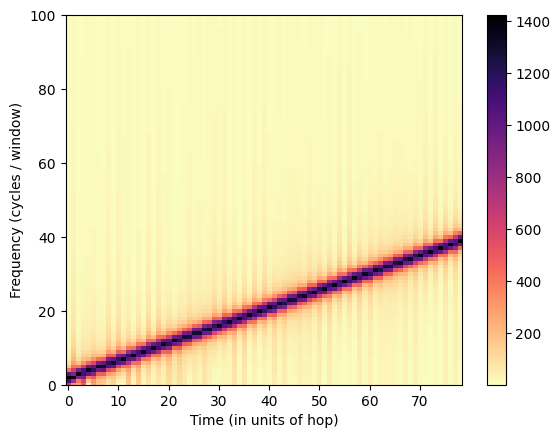

In [17]:
win = 4096
hop = 512
S = get_stft(y, win, hop)

plt.imshow(np.abs(S), aspect='auto', cmap='magma_r')
#plt.title("Amp")
plt.xlabel("Time (in units of hop)")
plt.ylabel("Frequency (cycles / window)")
plt.colorbar()
plt.ylim([0,100])

In [ ]:
sr*(20/2048) # cycles / sec (hz)

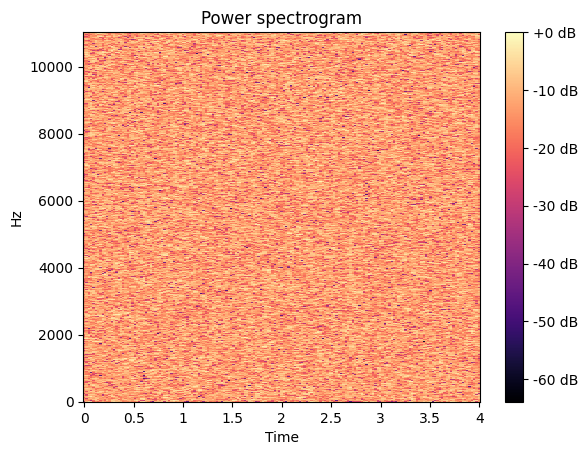

In [18]:
sr = 22050
x = np.random.randn(sr*4)
S = librosa.stft(x)
fig, ax = plt.subplots()
img = librosa.display.specshow(librosa.amplitude_to_db(np.abs(S),ref=np.max), y_axis='linear', x_axis='time', ax=ax)
ax.set_title('Power spectrogram')
fig.colorbar(img, ax=ax, format="%+2.0f dB")